In [1]:
import pandas as pd
import numpy as np 

# Menggabungkan dua Pandas Data Frame Merge

In [2]:
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows,n_cols)),
                 columns=cols)
df.head()

,A,B,C,D,E
0,16,5,18,14,19
1,16,13,7,5,18
2,7,10,9,11,10
3,10,11,18,10,1
4,10,4,14,17,7


In [3]:
df1 = df.copy(deep=True)
df1 = df1.drop([1,4]) #membuang baris indeks pertama dan keempat
df1

,A,B,C,D,E
0,16,5,18,14,19
2,7,10,9,11,10
3,10,11,18,10,1


In [4]:
df2 = df.copy(deep=True)
df2 = df2.drop([0,3]) #membuang baris indeks pertama dan keempat
df2

,A,B,C,D,E
1,16,13,7,5,18
2,7,10,9,11,10
4,10,4,14,17,7


In [5]:
df_inner = pd.merge(df1,df2, how='inner')
df_inner
#akan menampilkan data yang terdapat pada kedua dataframe

,A,B,C,D,E
0,7,10,9,11,10


In [6]:
df_outer = pd.merge(df1,df2, how='outer')
df_outer
# akan menggabungkan 2 dataframe dimana baris yang ada duplikasinya akan ditampilkan satu saja

,A,B,C,D,E
0,16,5,18,14,19
1,7,10,9,11,10
2,10,11,18,10,1
3,16,13,7,5,18
4,10,4,14,17,7


# Memecah nilai string suatu kolom ke dalam beberapa kolom baru pada Pandas Data Frame

In [7]:
data = {
    'nama':['Didi Kempot','Glenn Fredly','Mbah Surip'],
    'tempat kelahiran':['Surakarta, Jawa tengah','Jakarta, DKI Jakarta','Mojokerto, Jawa Timur']
}
df = pd.DataFrame(data)
df

,nama,tempat kelahiran
0,Didi Kempot,"Surakarta, Jawa tengah"
1,Glenn Fredly,"Jakarta, DKI Jakarta"
2,Mbah Surip,"Mojokerto, Jawa Timur"


In [15]:
df1 = pd.DataFrame({
    'nama':['aku suka kamu'],
    'tempat kelahiran':['Bekasi, Jawa Barat']
})
df=pd.concat([df,df1]).reset_index(drop=True)
df

,nama,tempat kelahiran,nama_depan,nama_belakang,kota,provinsi
0,Didi Kempot,"Surakarta, Jawa tengah",Didi,Kempot,Surakarta,Jawa tengah
1,Glenn Fredly,"Jakarta, DKI Jakarta",Glenn,Fredly,Jakarta,DKI Jakarta
2,Mbah Surip,"Mojokerto, Jawa Timur",Mbah,Surip,Mojokerto,Jawa Timur
3,aku suka kamu,"bekasi, Jawa Barat",aku,suka kamu,bekasi,Jawa Barat
4,aku suka kamu,"Bekasi, Jawa Barat",NaN,NaN,NaN,NaN


In [16]:
df[['nama_depan', 'nama_belakang']] = df['nama'].str.split(' ',n=1, expand=True) 
# nama displit/dibagi berdasarkan spasi, expand True kita mengijinkan outputnya berupa kolom
# n=1 berfungsi agar split dilakukan hanya 1 kali
df

,nama,tempat kelahiran,nama_depan,nama_belakang,kota,provinsi
0,Didi Kempot,"Surakarta, Jawa tengah",Didi,Kempot,Surakarta,Jawa tengah
1,Glenn Fredly,"Jakarta, DKI Jakarta",Glenn,Fredly,Jakarta,DKI Jakarta
2,Mbah Surip,"Mojokerto, Jawa Timur",Mbah,Surip,Mojokerto,Jawa Timur
3,aku suka kamu,"bekasi, Jawa Barat",aku,suka kamu,bekasi,Jawa Barat
4,aku suka kamu,"Bekasi, Jawa Barat",aku,suka kamu,NaN,NaN


In [17]:
df[['kota', 'provinsi']] = df['tempat kelahiran'].str.split(',', expand=True)
df

,nama,tempat kelahiran,nama_depan,nama_belakang,kota,provinsi
0,Didi Kempot,"Surakarta, Jawa tengah",Didi,Kempot,Surakarta,Jawa tengah
1,Glenn Fredly,"Jakarta, DKI Jakarta",Glenn,Fredly,Jakarta,DKI Jakarta
2,Mbah Surip,"Mojokerto, Jawa Timur",Mbah,Surip,Mojokerto,Jawa Timur
3,aku suka kamu,"bekasi, Jawa Barat",aku,suka kamu,bekasi,Jawa Barat
4,aku suka kamu,"Bekasi, Jawa Barat",aku,suka kamu,Bekasi,Jawa Barat


# Menata ulang Data Frame dengan multiple indexes menggunakan unstack

In [19]:
df = pd.read_csv('data_csv/titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


In [20]:
df.groupby(['sex','pclass'])['survived'].mean().to_frame()
#to_frame() untuk convert series ke dataframe atau untuk mempercantik tampilan

survived
sex    pclass          
female 1       0.965278
       2       0.886792
       3       0.490741
male   1       0.340782
       2       0.146199
       3       0.152130

In [21]:
# menata ulang dataframe dengan multiple index
df.groupby(['sex','pclass'])['survived'].mean().unstack()

pclass,1,2,3
sex,,,
female,0.965278,0.886792,0.490741
male,0.340782,0.146199,0.152130


In [24]:
import matplotlib.pyplot as plt


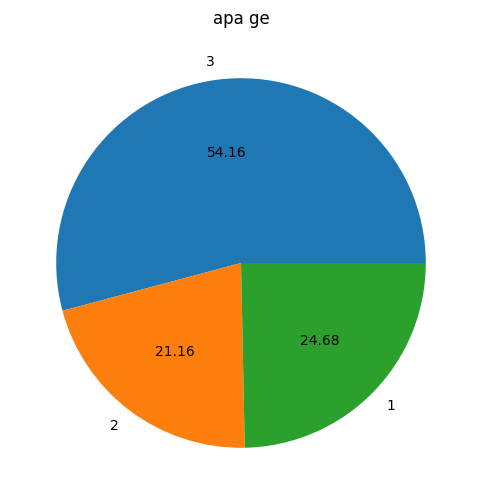

In [34]:
df_pclass3=df['pclass'].value_counts()[3]
df_pclass2=df['pclass'].value_counts()[2]
df_pclass1=df['pclass'].value_counts()[1]

count=[df_pclass3,df_pclass2,df_pclass1]
label=['3','2','1']
plt.figure(figsize = (6,6))
plt.pie(count, labels=label, autopct='%.2f')
plt.title('apa ge')
plt.show()

# Resampling pada data deret waktu | time series data

In [35]:
n_rows = 365 * 24 #24 merepresentasikan jumlah jam dalam hari
n_cols = 2
cols = ['col1','col2']

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows,n_cols)),
                 columns = cols)
df.index = pd.util.testing.makeDateIndex(n_rows, freq='H') # H berarti intervalnya per jam
df

C:\Users\Erlan\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\__init__.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing


,col1,col2
2000-01-01 00:00:00,5,19
2000-01-01 01:00:00,1,18
2000-01-01 02:00:00,6,1
2000-01-01 03:00:00,4,6
2000-01-01 04:00:00,18,8
...,...,...
2000-12-30 19:00:00,12,17
2000-12-30 20:00:00,4,11
2000-12-30 21:00:00,5,14
2000-12-30 22:00:00,17,1


In [37]:
# Resampling data dengan interval monthly
df.resample('M')['col1'].sum().to_frame()

,col1
2000-01-31,7629
2000-02-29,6970
2000-03-31,7721
2000-04-30,7267
2000-05-31,7476
2000-06-30,7105
2000-07-31,7566
2000-08-31,7448
2000-09-30,7517
2000-10-31,7494


In [38]:
# Resampling data dengan interval Daily
df.resample('D')['col1'].sum().to_frame()

,col1
2000-01-01,226
2000-01-02,246
2000-01-03,225
2000-01-04,245
2000-01-05,247
...,...
2000-12-26,223
2000-12-27,204
2000-12-28,244
2000-12-29,211


# Membentuk dummy Data Frame

In [39]:
# menggunakan dictionary
pd.DataFrame({
    'col1':[1,2,3,4],
    'col2':[5,6,7,8]
})

,col1,col2
0,1,5
1,2,6
2,3,7
3,4,8


In [44]:
# menggunakan numpy array
n_rows = 5
n_cols = 3

arr = np.random.randint(1, 20, size=(n_rows,n_cols))
arr
pd.DataFrame(arr, columns = tuple('ABC'))

,A,B,C
0,2,5,15
1,7,9,15
2,1,3,1
3,4,7,15
4,8,4,18


In [48]:
# Memanfaatkan pandas.util.testing
pd.util.testing.makeDataFrame().head()
pd.util.testing.makeMixedDataFrame().head()
pd.util.testing.makeTimeDataFrame().head()
pd.util.testing.makeMissingDataframe().head()

,A,B,C,D
JlVwKGhCqM,-0.526562,1.130299,1.787329,-1.407089
ZWDJflPqSu,-0.472792,-0.812190,-0.160866,-1.812670
zFKKocywZj,-0.721148,-0.576154,0.943296,NaN
BaoIIKmh0u,1.245808,NaN,NaN,-1.140581
GCBGiV4Nud,-1.080335,0.489182,-3.108390,NaN


# Formatting tampilan Data Frame

In [49]:
n_rows = 5
n_cols = 2
cols = ['omset', 'operasional']

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows,n_cols)),
                 columns=cols)
df.head()

,omset,operasional
0,4,4
1,9,15
2,10,17
3,10,1
4,11,6


In [50]:
# konversi ke dalama 100 ribu dan 10 ribu
df['omset'] = df['omset'] * 100_000 # tanda _ merupakan ignore karakter
df['operasional'] = df['operasional'] * 10_000
df

,omset,operasional
0,400000,40000
1,900000,150000
2,1000000,170000
3,1000000,10000
4,1100000,60000


In [52]:
# persiapan data frame
df.index = pd.util.testing.makeDateIndex(n_rows, freq='D')
df = df.reset_index()
df = df.rename(columns={'index':'tanggal'})
df

,tanggal,omset,operasional
0,2000-01-01,400000,40000
1,2000-01-02,900000,150000
2,2000-01-03,1000000,170000
3,2000-01-04,1000000,10000
4,2000-01-05,1100000,60000


In [53]:
#urutan tidak harus sesui dengan dataframe, tetapi namanya harus sama
formatku ={
    'tanggal' : '{:%d/%m/%y}',
    'omset' : 'Rp {:.2f}', #.2f artinya kita akan menampilkan 2 digit ekstra di belakang koma
    'operasional' : 'Rp {:.2f}'
}
laporan = df.style.format(formatku)
laporan

,tanggal,omset,operasional
0,01/01/00,Rp 400000.00,Rp 40000.00
1,02/01/00,Rp 900000.00,Rp 150000.00
2,03/01/00,Rp 1000000.00,Rp 170000.00
3,04/01/00,Rp 1000000.00,Rp 10000.00
4,05/01/00,Rp 1100000.00,Rp 60000.00


In [54]:
type(laporan) #objek menjadi bukan dataframe
# maka tidak bisa dilakukan pengoperasian yang ada pada data fram seperti .head() itu tidak bisa dilakukan pada styler

pandas.io.formats.style.Styler

In [55]:
# beberapa hal yang dapat dilakukan oleh styler
laporan.hide_index()

C:\Users\Erlan\AppData\Local\Temp\ipykernel_9832\2689267819.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  laporan.hide_index()


tanggal,omset,operasional
01/01/00,Rp 400000.00,Rp 40000.00
02/01/00,Rp 900000.00,Rp 150000.00
03/01/00,Rp 1000000.00,Rp 170000.00
04/01/00,Rp 1000000.00,Rp 10000.00
05/01/00,Rp 1100000.00,Rp 60000.00


In [56]:
laporan.set_caption('Data omset dan operasionel')

tanggal,omset,operasional
01/01/00,Rp 400000.00,Rp 40000.00
02/01/00,Rp 900000.00,Rp 150000.00
03/01/00,Rp 1000000.00,Rp 170000.00
04/01/00,Rp 1000000.00,Rp 10000.00
05/01/00,Rp 1100000.00,Rp 60000.00


In [60]:
laporan.highlight_min('omset', color='pink')
laporan.highlight_max('omset', color='green')

laporan.highlight_min('operasional', color='blue')
laporan.highlight_max('operasional', color='red')

tanggal,omset,operasional
01/01/00,Rp 400000.00,Rp 40000.00
02/01/00,Rp 900000.00,Rp 150000.00
03/01/00,Rp 1000000.00,Rp 170000.00
04/01/00,Rp 1000000.00,Rp 10000.00
05/01/00,Rp 1100000.00,Rp 60000.00


# Menggabungkan dua Data Frame secara berdampingan 

In [62]:
df1 = pd.DataFrame({
    'col1':[1,2,3],
    'col2':[10,20,30]
})
df1

,col1,col2
0,1,10
1,2,20
2,3,30


In [68]:
df2 = pd.DataFrame({
    'col3':[4,5,6],
    'col4':[40,50,60]
})
df2

,col3,col4
0,4,40
1,5,50
2,6,60


In [69]:
# menggabungkan 2 dataframe (merge) secara berdampingan
df = pd.merge(df1, df2, left_index=True, right_index=True)
df

,col1,col2,col3,col4
0,1,10,4,40
1,2,20,5,50
2,3,30,6,60


# Agregasi pada Pandas Data Frame dengan agg

In [70]:
df = pd.read_csv('data_csv/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Mengenal Groupby dan fungsi agregasi

In [72]:
df.groupby('Species')['PetalLengthCm'].count().to_frame()
# count digunakan untuk menghitung jumlah baris / data pada kolom petalLength

,PetalLengthCm
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [73]:
df.groupby('Species')['PetalLengthCm'].mean().to_frame()

,PetalLengthCm
Species,
Iris-setosa,1.464
Iris-versicolor,4.260
Iris-virginica,5.552


In [74]:
df.groupby('Species')['PetalLengthCm'].median().to_frame()

,PetalLengthCm
Species,
Iris-setosa,1.50
Iris-versicolor,4.35
Iris-virginica,5.55


In [75]:
df.groupby('Species')['PetalLengthCm'].agg(['count','mean','median'])

,count,mean,median
Species,,,
Iris-setosa,50,1.464,1.50
Iris-versicolor,50,4.260,4.35
Iris-virginica,50,5.552,5.55


In [76]:
# Agregasi dengan describe
df.groupby('Species')['PetalLengthCm'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Iris-setosa,50.0,1.464,0.173511,1.0,1.4,1.50,1.575,1.9
Iris-versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
Iris-virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


# Memantau penggunaan memory pada Data Frame

In [77]:
df_titanic = pd.read_csv('data_csv/titanicfull.csv')
df_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


In [78]:
df_iris = pd.read_csv('data_csv/Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [79]:
df_titanic.info(memory_usage='deep') 
# parameter deep digunakan karna kita akan mengkalkulasi sampai data terkahir dalam data frame tersebut


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 452.7 KB


In [80]:
df_iris.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 16.3 KB


In [81]:
# Memantau penggunaan memori di tiap kolomnya dalam sebuah dataframe dengan satuan byte
df_titanic.memory_usage(deep=True)

Index          128
pclass       10472
survived     10472
name        110127
sex          80781
age          10472
sibsp        10472
parch        10472
ticket       83502
fare         10472
cabin        50366
embarked     75870
dtype: int64

# Seleksi baris pada Data Frame dengan query

In [ ]:
df = pd.DataFrame({
    'kolom_satu':[1,2,3,4,5],
    'kolom dua':[10,20,30,40,50]
})
df

In [84]:
df.query('kolom_satu > 2')

,kolom_satu,kolom_dua
2,3,30
3,4,40
4,5,50


In [86]:
df.query('`kolom dua`>30') 
# jika terdapat spasi di nama kolom maka kita apit dengan back tick, tombolnya di bawah esc di keyboard

,kolom_satu,kolom dua
3,4,40
4,5,50


# UTC dan konversi zona waktu pada Python Pandas 

In [87]:
# Persiapan Series 
s = pd.Series(range(1591683521, 1592201921, 3600)) # berupa jangkauan nilai dari sekian sampai sekian dengan step 3600, 3600 merepresentasikann jumlah detik dalam satu jam
# 1591683521 merupakan unix epoch time dimana waktu jumlah detik yang dimulai dari 1 januari 1970
s = pd.to_datetime(s, unit='s')
# unit s berarti ditampilkan dalam detik
s.head()

0   2020-06-09 06:18:41
1   2020-06-09 07:18:41
2   2020-06-09 08:18:41
3   2020-06-09 09:18:41
4   2020-06-09 10:18:41
dtype: datetime64[ns]

In [88]:
# standarisasi menggunakan utc
s = s.dt.tz_localize('UTC')
s.head()

0   2020-06-09 06:18:41+00:00
1   2020-06-09 07:18:41+00:00
2   2020-06-09 08:18:41+00:00
3   2020-06-09 09:18:41+00:00
4   2020-06-09 10:18:41+00:00
dtype: datetime64[ns, UTC]

In [90]:
s = s.dt.tz_convert('Asia/Jakarta')
s.head()

0   2020-06-09 13:18:41+07:00
1   2020-06-09 14:18:41+07:00
2   2020-06-09 15:18:41+07:00
3   2020-06-09 16:18:41+07:00
4   2020-06-09 17:18:41+07:00
dtype: datetime64[ns, Asia/Jakarta]

In [91]:
s = s.dt.tz_convert('Australia/Hobart')
s.head()

0   2020-06-09 16:18:41+10:00
1   2020-06-09 17:18:41+10:00
2   2020-06-09 18:18:41+10:00
3   2020-06-09 19:18:41+10:00
4   2020-06-09 20:18:41+10:00
dtype: datetime64[ns, Australia/Hobart]

# Pengaturan tampilan pada Python Pandas

In [93]:
df = pd.read_csv('data_csv/titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


In [94]:
pd.set_option('display.max_rows',5)
pd.set_option('display.max_columns',6)
pd.set_option('display.max_colwidth',20)

df

,pclass,survived,name,...,fare,cabin,embarked
0,1,1,"Allen, Miss. Eli...",...,211.3375,B5,S
1,1,1,"Allison, Master....",...,151.5500,C22 C26,S
...,...,...,...,...,...,...,...
1307,3,0,"Zakarian, Mr. Ortin",...,7.2250,NaN,C
1308,3,0,"Zimmerman, Mr. Leo",...,7.8750,NaN,S


In [95]:
pd.reset_option('^display.',silent=True)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C


In [96]:
pd.describe_option()

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.column_space No description available.
    [defa

# Membuat Data Frame dari hasil seleksi Spreadsheet 

In [97]:
df = pd.read_clipboard()
df

,Membuat,Data,Frame,dari,hasil,seleksi,Spreadsheet


#  Fungsi agregasi first dan last pada Python Pandas

In [98]:
df = pd.DataFrame({
    'dokter' :['Budi','Wati','Iwan','Budi','Budi','Wati'],
    'pasien' :['Abdul','Ahmad','Asep','Joko','Wiwin','Lisa']
})
df

,dokter,pasien
0,Budi,Abdul
1,Wati,Ahmad
2,Iwan,Asep
3,Budi,Joko
4,Budi,Wiwin
5,Wati,Lisa


In [100]:
df.groupby('dokter')['pasien'].count().to_frame()

,pasien
dokter,
Budi,3
Iwan,1
Wati,2


In [101]:
df.groupby('dokter')['pasien'].first().to_frame()

,pasien
dokter,
Budi,Abdul
Iwan,Asep
Wati,Ahmad


In [102]:
df.groupby('dokter')['pasien'].last().to_frame()

,pasien
dokter,
Budi,Wiwin
Iwan,Asep
Wati,Lisa


# Mengenal explode dan implode List pada Pandas Data Frame

In [104]:
df = pd.DataFrame({
    'Team':['DC','Marvel'],
    'Heroes':[['Batman','Superman','Wonder Woman','Aquaman','Green Latern','Shazam'],
             ['Iron Man','Captain America','Ant-Man','Black Panther','Captain Marvel']]
})
df

,Team,Heroes
0,DC,"[Batman, Superman, Wonder Woman, Aquaman, Gree..."
1,Marvel,"[Iron Man, Captain America, Ant-Man, Black Pan..."


In [105]:
df1= df.explode('Heroes')
df1

,Team,Heroes
0,DC,Batman
0,DC,Superman
0,DC,Wonder Woman
0,DC,Aquaman
0,DC,Green Latern
0,DC,Shazam
1,Marvel,Iron Man
1,Marvel,Captain America
1,Marvel,Ant-Man
1,Marvel,Black Panther


In [106]:
df2=pd.DataFrame({'Team':['DC','Marvel']})

In [107]:
df2['Imploded'] = df1.groupby(df1.index)['Heroes'].agg(list)
df2

,Team,Imploded
0,DC,"[Batman, Superman, Wonder Woman, Aquaman, Gree..."
1,Marvel,"[Iron Man, Captain America, Ant-Man, Black Pan..."


# Random Sampling pada Pandas Data Frame

In [108]:
df = pd.DataFrame({
    'col_1':[1,2,3,4,5],
    'col_2':[10,20,30,40,50]
})
df

,col_1,col_2
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


In [112]:
# Random sampling without replacement
df.sample(n=4, replace=False, random_state=0) 
# random state ditentukan dengan bebas untuk menjamin agar eksperimen bisa dilakukan ulang dengan hasil sama persis

,col_1,col_2
2,3,30
0,1,10
1,2,20
3,4,40


In [110]:
# Random sampling with replacement
df.sample(n=4, replace=True, random_state=0)
# memiliki kesempatan untuk sampling ulang

,col_1,col_2
4,5,50
0,1,10
3,4,40
3,4,40


# Akses nilai variabel dalam fungsi query

In [113]:
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows,n_cols)),
                 columns=cols)
df.head()

,A,B,C,D,E
0,15,1,1,19,9
1,8,13,5,2,5
2,13,4,15,4,6
3,2,12,11,13,2
4,7,16,8,17,12


In [114]:
# Akses nilai variabel pada query()
df.query('A > 5')

,A,B,C,D,E
0,15,1,1,19,9
1,8,13,5,2,5
2,13,4,15,4,6
4,7,16,8,17,12


In [116]:
rerata = df['A'].mean()
rerata
df.query('A > @rerata')
# akses nilai dengan karakter @

,A,B,C,D,E
0,15,1,1,19,9
2,13,4,15,4,6


# Tipe data ordinal pada Pandas Data Frame

In [2]:
# tipe data ordinal yaitu tipe data yang memiliki tingkatan
# persiapan dataframe
df = pd.DataFrame({
    'pelanggan':[11,12,13,14],
    'kepuasan':['baik','cukup','buruk','cukup']
})
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


In [6]:
from pandas.api.types import CategoricalDtype

tingkat_kepuasan = CategoricalDtype(['buruk','cukup','baik','sangat baik'],
                                    ordered = True)
df['kepuasan']=df['kepuasan'].astype(tingkat_kepuasan)
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


In [8]:
df = df.sort_values('kepuasan',ascending=True)
df

,pelanggan,kepuasan
2,13,buruk
1,12,cukup
3,14,cukup
0,11,baik


In [11]:
df[df['kepuasan']>='cukup']

,pelanggan,kepuasan
1,12,cukup
3,14,cukup
0,11,baik


# Visualisasi Data - Pandas Data Frame | Plotting

In [12]:
n_rows = 40
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows,n_cols)),
                 columns=cols)
df.head()

,A,B,C,D,E
0,5,1,17,2,8
1,15,7,7,14,13
2,13,17,8,13,12
3,17,19,19,1,5
4,2,2,5,5,17


<AxesSubplot:>

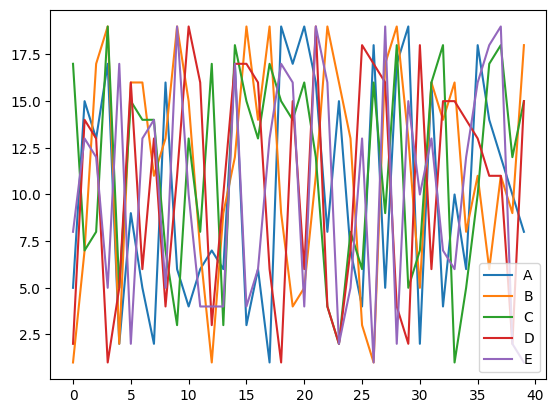

In [13]:
# Line Plot
df.plot(kind='line')
#sumbu x merepresentasikan barisnya
# sumbu y merepresentasikan nilai yang tertampung dala dataframe

<AxesSubplot:>

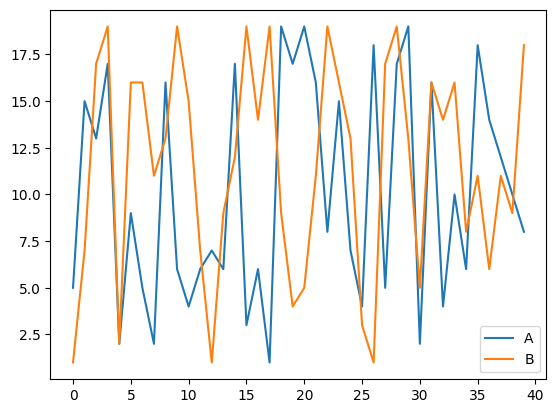

In [14]:
df[['A','B']].plot(kind='line')

In [15]:
# Bar Plot
df.head()

,A,B,C,D,E
0,5,1,17,2,8
1,15,7,7,14,13
2,13,17,8,13,12
3,17,19,19,1,5
4,2,2,5,5,17


<AxesSubplot:>

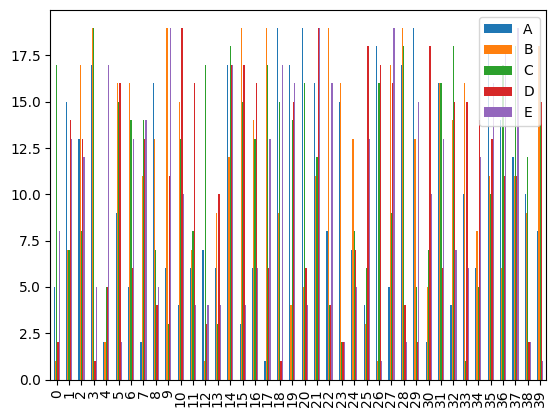

In [16]:
df.plot(kind='bar')
# sumbu x merepresentasikan index dari 0-49

<AxesSubplot:>

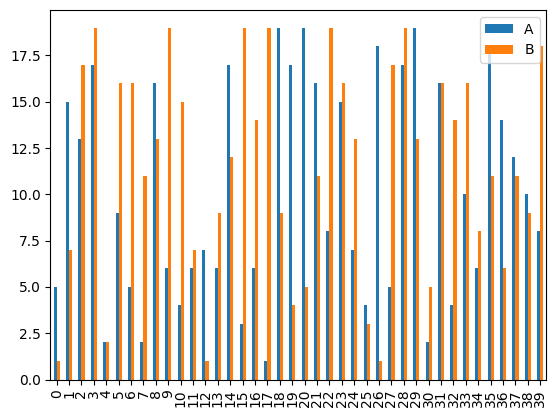

In [17]:
df[['A','B']].plot(kind='bar')

<AxesSubplot:>

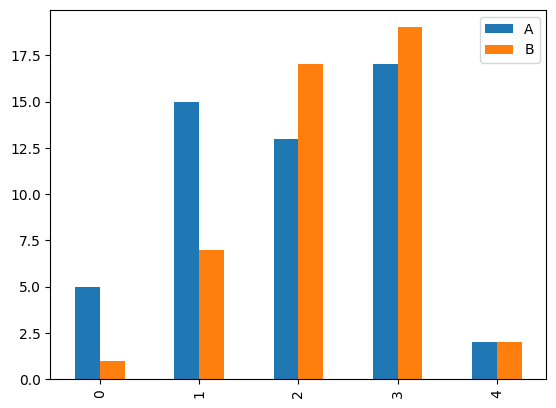

In [18]:
df[['A','B']].head().plot(kind='bar')

<AxesSubplot:>

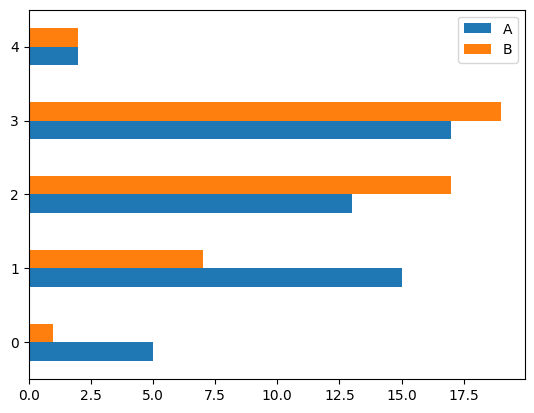

In [20]:
df[['A','B']].head().plot(kind='barh')
# divisualisasikan secara horizontal

<AxesSubplot:>

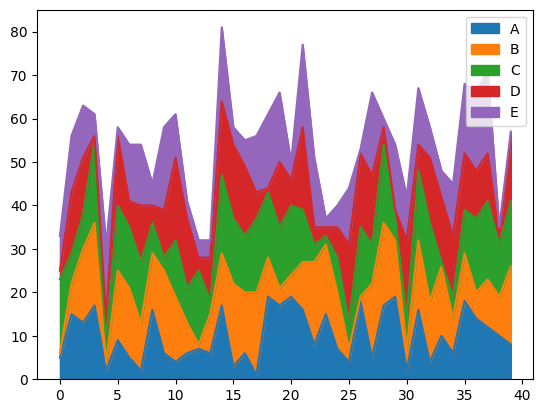

In [21]:
# Area Plot
df.plot(kind='area')

<AxesSubplot:>

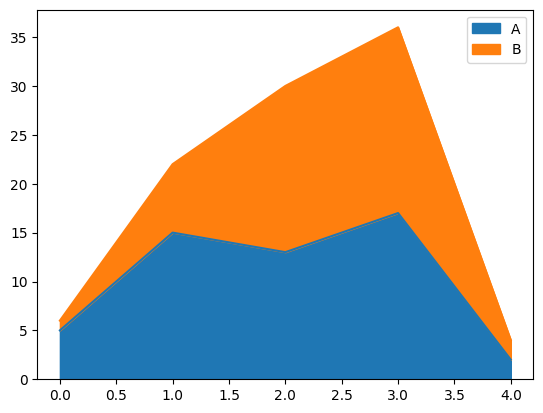

In [22]:
df[['A','B']].head().plot(kind='area')

<AxesSubplot:>

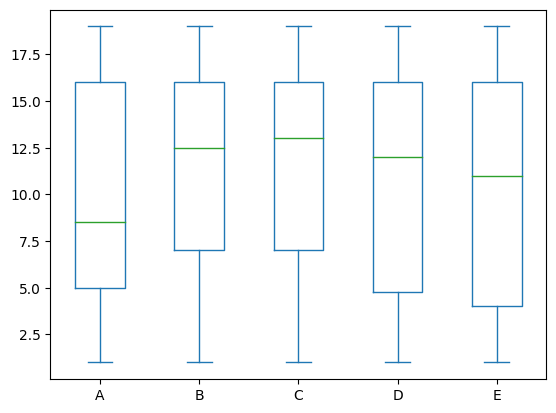

In [23]:
# Box Plot
df.plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

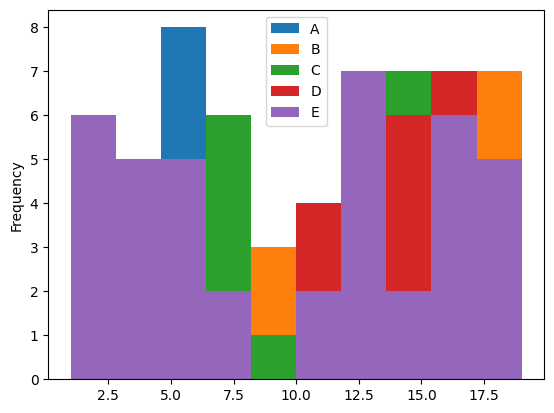

In [24]:
# Histogram
df.plot(kind='hist')
# sumbu y merepresantasikan jumlah dan sumbu x merupakan 

<AxesSubplot:ylabel='Frequency'>

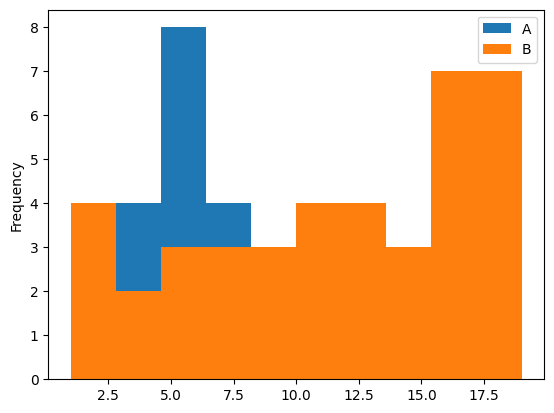

In [25]:
df[['A','B']].plot(kind='hist')

<AxesSubplot:ylabel='Density'>

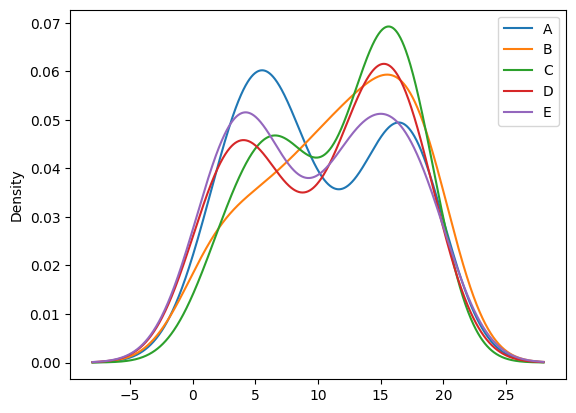

In [27]:
# Kernel Density Estimation (KDE)
df.plot(kind='kde')

<AxesSubplot:xlabel='A', ylabel='B'>

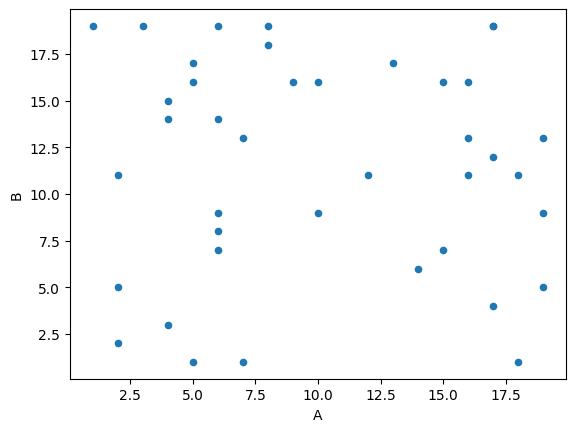

In [28]:
# Scatter Plot
df.plot(x='A', y='B', kind='scatter')

# Nilai Kumulatif pada Pandas Data Frame

In [30]:
df = pd.DataFrame({
    'pemain':['Budi','Joni','Iwan','Budi','Budi','Iwan','Asep','Joni'],
    'goal':[2,1,3,1,1,2,2,3]
})
df

,pemain,goal
0,Budi,2
1,Joni,1
2,Iwan,3
3,Budi,1
4,Budi,1
5,Iwan,2
6,Asep,2
7,Joni,3


In [32]:
# Menampilkan Nilai Kumulatif
df['goal'].cumsum().to_frame()

,goal
0,2
1,3
2,6
3,7
4,8
5,10
6,12
7,15


In [33]:
df['jumlah goal kumulatif'] = df['goal'].cumsum()
df

,pemain,goal,jumlah goal kumulatif
0,Budi,2,2
1,Joni,1,3
2,Iwan,3,6
3,Budi,1,7
4,Budi,1,8
5,Iwan,2,10
6,Asep,2,12
7,Joni,3,15


In [34]:
df['jumlah goal kumulatif tiap pemain'] = df.groupby('pemain')['goal'].cumsum()
df

,pemain,goal,jumlah goal kumulatif,jumlah goal kumulatif tiap pemain
0,Budi,2,2,2
1,Joni,1,3,1
2,Iwan,3,6,3
3,Budi,1,7,3
4,Budi,1,8,4
5,Iwan,2,10,5
6,Asep,2,12,2
7,Joni,3,15,4


In [35]:
df['cummax'] = df['goal'].cummax()
df

,pemain,goal,jumlah goal kumulatif,jumlah goal kumulatif tiap pemain,cummax
0,Budi,2,2,2,2
1,Joni,1,3,1,2
2,Iwan,3,6,3,3
3,Budi,1,7,3,3
4,Budi,1,8,4,3
5,Iwan,2,10,5,3
6,Asep,2,12,2,3
7,Joni,3,15,4,3


In [36]:
df['cummin'] = df['goal'].cummin()
df

,pemain,goal,jumlah goal kumulatif,jumlah goal kumulatif tiap pemain,cummax,cummin
0,Budi,2,2,2,2,2
1,Joni,1,3,1,2,1
2,Iwan,3,6,3,3,1
3,Budi,1,7,3,3,1
4,Budi,1,8,4,3,1
5,Iwan,2,10,5,3,1
6,Asep,2,12,2,3,1
7,Joni,3,15,4,3,1


In [38]:
df['cumprod'] = df['goal'].cumprod()
df
# diperoleh dari perkalian kummulatiif, misal di index 3 merupakan hasil perkalian dari 2x1x3

,pemain,goal,jumlah goal kumulatif,jumlah goal kumulatif tiap pemain,cummax,cummin,cumprod
0,Budi,2,2,2,2,2,2
1,Joni,1,3,1,2,1,2
2,Iwan,3,6,3,3,1,6
3,Budi,1,7,3,3,1,6
4,Budi,1,8,4,3,1,6
5,Iwan,2,10,5,3,1,12
6,Asep,2,12,2,3,1,24
7,Joni,3,15,4,3,1,72


# Mapping Data Frame dengan applymap()

In [60]:
df = pd.DataFrame({
    'jenis_kelamin':['Pria','Wanita','Lelaki','lelaki','Perempuan'],
    'usia':[23,21,24,22,21],
    'shift':['pagi','siang','Malam','Siang','pagi']
})
df

,jenis_kelamin,usia,shift
0,Pria,23,pagi
1,Wanita,21,siang
2,Lelaki,24,Malam
3,lelaki,22,Siang
4,Perempuan,21,pagi


In [61]:
df = df.applymap(lambda x: x.lower() if type(x) == str else(x))
# lambda akan menerima nilai x, x ini akan diuji tipe datanya, apabila nilainya str(string) akan dikenakan fungsi lowercase, jika tidak maka akan dikembalikan
df

,jenis_kelamin,usia,shift
0,pria,23,pagi
1,wanita,21,siang
2,lelaki,24,malam
3,lelaki,22,siang
4,perempuan,21,pagi


In [62]:
# applymap() dengan dictionary
mapping = {
    'pria':'L',
    'lelaki' :'L',
    'wanita':'P',
    'perempuan':'P',
    'pagi':1,
    'siang':2,
    'malam':3
}
df.applymap(mapping.get)

,jenis_kelamin,usia,shift
0,L,None,1
1,P,None,2
2,L,None,3
3,L,None,2
4,P,None,1


In [63]:
mapping = {
    'pria':'L',
    'lelaki' :'L',
    'wanita':'P',
    'perempuan':'P',
    'pagi':1,
    'siang':2,
    'malam':3
}
df[['jenis_kelamin','shift']] = df[['jenis_kelamin','shift']].applymap(mapping.get)

df

,jenis_kelamin,usia,shift
0,L,23,1
1,P,21,2
2,L,24,3
3,L,22,2
4,P,21,1


# Memadukan fungsi agregasi dengan transform

In [64]:
df = pd.DataFrame({
    'no_nota':[1,1,1,2,2,3,4,5],
    'kopi':['latte','cappuccino','espresso','latte','espresso','cappuccino','latte','espresso'],
    'harga':[50,60,80,150,120,60,100,40]
})
df

,no_nota,kopi,harga
0,1,latte,50
1,1,cappuccino,60
2,1,espresso,80
3,2,latte,150
4,2,espresso,120
5,3,cappuccino,60
6,4,latte,100
7,5,espresso,40


In [65]:
df.groupby('no_nota')['harga'].sum().to_frame()

,harga
no_nota,
1,190
2,270
3,60
4,100
5,40


In [66]:
df['total_harga'] = df.groupby('no_nota')['harga'].transform(sum)
df

,no_nota,kopi,harga,total_harga
0,1,latte,50,190
1,1,cappuccino,60,190
2,1,espresso,80,190
3,2,latte,150,270
4,2,espresso,120,270
5,3,cappuccino,60,60
6,4,latte,100,100
7,5,espresso,40,40


In [67]:
# menghitung total omset untuk tiap kopi yang dijual
df.groupby('kopi')['harga'].sum().to_frame()

,harga
kopi,
cappuccino,120
espresso,240
latte,300


In [69]:
df['total_omset'] = df.groupby('kopi')['harga'].transform(sum)
df

,no_nota,kopi,harga,total_harga,total_omset
0,1,latte,50,190,300
1,1,cappuccino,60,190,120
2,1,espresso,80,190,240
3,2,latte,150,270,300
4,2,espresso,120,270,240
5,3,cappuccino,60,60,120
6,4,latte,100,100,300
7,5,espresso,40,40,240


# Menyatukan kolom pada Pandas Data Frame

In [70]:

df = pd.DataFrame({
    'nama':['bayu','indra','devi','agni'],
    'jenis_kelamin':['L','L','P','L'],
    'usia':[23,22,21,25]
})
df

,nama,jenis_kelamin,usia
0,bayu,L,23
1,indra,L,22
2,devi,P,21
3,agni,L,25


In [71]:
# menytaukan kolom dengan str.cat()
df['nama'].str.cat(df['jenis_kelamin'],sep=', ').to_frame()

,nama
0,"bayu, L"
1,"indra, L"
2,"devi, P"
3,"agni, L"


In [72]:
df['nama_jk'] = df['nama'].str.cat(df['jenis_kelamin'],sep=', ')
df
# hanya digunakan untuk 2 kolom berbeda dengan tipe data hanya string

,nama,jenis_kelamin,usia,nama_jk
0,bayu,L,23,"bayu, L"
1,indra,L,22,"indra, L"
2,devi,P,21,"devi, P"
3,agni,L,25,"agni, L"


In [73]:
# konversikan terlebih dahulu kolom usia
df['nama'].str.cat(df['usia'].astype('str'),sep=' - ').to_frame()

,nama
0,bayu - 23
1,indra - 22
2,devi - 21
3,agni - 25


In [74]:
df['nama_usia'] = df['nama'].str.cat(df['usia'].astype('str'),sep=' - ')
df

,nama,jenis_kelamin,usia,nama_jk,nama_usia
0,bayu,L,23,"bayu, L",bayu - 23
1,indra,L,22,"indra, L",indra - 22
2,devi,P,21,"devi, P",devi - 21
3,agni,L,25,"agni, L",agni - 25


# Seleksi baris dengan banyak kriteria pada Data Frame

In [77]:
df = pd.read_csv('data_csv/titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


In [79]:
# seleksi baris dengan banyak kriteria
df[(df['sex']=='female')&(df['age'] >= 60) & (df['embarked']== 'S') & (df['survived']==1)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
83,1,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S
116,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S


In [80]:
df[
    (df['sex']=='female')&
    (df['age'] >= 60) & 
    (df['embarked']== 'S') & 
    (df['survived']==1)
]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
83,1,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S
116,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S


In [82]:
# masukkan ke dalam variabel berbeda
kr1 =df['sex']=='female'
kr2 = df['age'] >= 60
kr3 = df['embarked']== 'S'
kr4 = df['survived']==1
df[kr1 & kr2 & kr3 & kr4]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
83,1,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S
116,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S


# Mengacak urutan baris pada Data Frame

In [83]:
n_rows = 6
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 5, size=(n_rows,n_cols)),
                 columns=cols)
df.head()

,A,B,C,D,E
0,4,3,2,1,1
1,4,3,2,1,2
2,2,1,4,3,3
3,2,4,3,1,2
4,2,3,1,4,2


In [84]:
# mengacak urutan baris 
df.sample(frac=1.0, random_state=1) # random state dispesifikasikan untuk menjamin agar yang kita lakukan dapat direplikasi


,A,B,C,D,E
2,2,1,4,3,3
1,4,3,2,1,2
4,2,3,1,4,2
0,4,3,2,1,1
3,2,4,3,1,2
5,4,1,3,1,3


In [85]:
df.sample(frac=1.0, random_state=1).reset_index(drop=True)

,A,B,C,D,E
0,2,1,4,3,3
1,4,3,2,1,2
2,2,3,1,4,2
3,4,3,2,1,1
4,2,4,3,1,2
5,4,1,3,1,3


# Akses sekelompok data pada Data Frame yang sudah terkelompok

In [87]:

df = pd.read_csv('data_csv/titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


In [90]:
# mengakses sekelompok data dengan get_group()
grouped_df = df.groupby('sex')
grouped_df.get_group('female').head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
18,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C


In [91]:
grouped_df=df.groupby('survived')
grouped_df.get_group(1).head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.00,1,0,PC 17757,227.5250,C62 C64,C
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.00,0,0,PC 17477,69.3000,B35,C
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.00,0,0,19877,78.8500,NaN,S
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.00,0,0,27042,30.0000,A23,S
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.00,0,1,PC 17558,247.5208,B58 B60,C


# Agregasi pada banyak kolom Data Frame dengan agg

In [92]:
df = pd.read_csv('data_csv/titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


In [93]:
df.groupby('pclass').agg({
    'pclass':'count',
    'age':['mean','max'],
    'survived':'mean'
})

pclass        age        survived
        count       mean   max      mean
pclass                                  
1         323  39.159930  80.0  0.619195
2         277  29.506705  70.0  0.429603
3         709  24.816367  74.0  0.255289

In [94]:
df.groupby('pclass').agg(n_pass =('pclass','count'),
    avg_age=('age','mean'),
    max_avg=('age','max'),
    susvival_rate=('survived','mean'))

,n_pass,avg_age,max_avg,susvival_rate
pclass,,,,
1,323,39.159930,80.0,0.619195
2,277,29.506705,70.0,0.429603
3,709,24.816367,74.0,0.255289
